In [ ]:
!pip install scikit-learn

In [ ]:
!pip install matplotlib seaborn

##What the Dataset Is About
The dataset contains 20,000 people with information about:
*   Calories
*   Protein, carbs, and fats
*   BMI, weight, height
*   Diet types
*   Workout habits


I am exploring how different nutritional and lifestyle patterns relate to a person’s overall health level.

In [ ]:
df.shape

(20000, 56)

In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
import pandas as pd
from google.colab import drive
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')

Mounted at /content/drive


##Loading and Viewing the Data

In this step, I load the CSV file into a pandas DataFrame and look at the first few rows.
This helps me understand the structure of the dataset (columns, types, number of rows).

In [ ]:
dfpath = '/content/drive/MyDrive/Colab Notebooks/ProjectData/Final_data.csv'
metadatapath = '/content/drive/MyDrive/Colab Notebooks/ProjectData/meal_metadata.csv'

In [ ]:
df=pd.read_csv(dfpath)
metadata = pd.read_csv(metadatapath)

In [ ]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [ ]:
metadata.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [ ]:
print(df.equals(metadata))

False


##Dataset Structure
Here, checcking:

*   How many rows and columns the dataset has
*   What type each column is (numeric or object)
*   Whether any column contains missing values

In this I'll cleaning the data, because it tells me if the data is ready for analysis or if I need to handle missing or inconsistent values and see how the feauters that data has that I am able to see which see to use for what I will be exporing and which will guide my later steps in EDA and modeling.

In [ ]:
# print dimension
print(df.shape)

(20000, 54)


In [ ]:
# print dimension
print(metadata.shape)

(168, 54)


In [ ]:
print(df.columns)

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

#Checking for any missing Value

In [ ]:
missing = df.isnull().sum()
missing = missing[missing > 200]
print(missing)

ncols_before = df.shape[1]
numeric_df = df.drop(columns=missing.index)
ncols_after = df.shape[1]
print(f"** Removed {ncols_before - ncols_after} columns **")

Series([], dtype: int64)
** Removed 0 columns **


In [ ]:
missing_all = df.isnull().sum()
print(missing_all)

Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_mg                    0
serving_size_g              

In [ ]:
features_list = set(df.columns)
len(features_list)

54

##Feature Relationships with a Heatmap
I created a new variable called "copydf" and a heatmap to see how strongly each feature is related to the others. I used all the features that are related to health to understand which ones might be useful predictors of a person’s health. The heatmap helps me see how strongly the features are correlated, and this will help me decide which features are important for building a model that predicts whether someone is healthy or unhealthy later in my machine learning analysis.

In [ ]:
copydf=df[['Proteins', 'Carbs','Fats','Fat_Percentage','Daily meals frequency','meal_name','Calories','meal_type','diet_type','serving_size_g','cal_from_macros','protein_per_kg','cal_balance']]

In [ ]:
copydf=df[['Proteins', 'Carbs', 'Fats', 'Fat_Percentage', 'Daily meals frequency',
 'meal_name', 'Calories',  'serving_size_g',
 'cal_from_macros', 'protein_per_kg', 'cal_balance',
 'Workout_Frequency (days/week)',  'Calories_Burned',
 'Burns Calories (per 30 min)', 'Age',  'BMI']]

In [ ]:
copydf

,Proteins,Carbs,Fats,Fat_Percentage,Daily meals frequency,meal_name,Calories,serving_size_g,cal_from_macros,protein_per_kg,cal_balance,Workout_Frequency (days/week),Calories_Burned,Burns Calories (per 30 min),Age,BMI
0,106.05,267.68,71.63,26.800377,2.99,Other,1806.0,120.47,2139.59,1.624789,333.59,3.99,1080.90,342.58,34.91,24.87
1,85.41,214.32,56.97,27.655021,3.01,Other,1577.0,109.15,1711.65,1.514093,134.65,4.00,1809.91,357.16,23.37,23.48
2,98.11,246.04,65.48,24.320821,1.99,Other,1608.0,399.43,1965.92,1.663445,357.92,2.99,802.26,359.63,33.20,21.15
3,80.84,203.22,54.56,32.813572,3.00,Other,2657.0,314.31,1627.28,0.862017,-1029.72,3.99,1450.79,351.65,38.69,32.45
4,133.05,332.79,88.43,17.307319,3.00,Other,1470.0,99.22,2659.23,2.538153,1189.23,4.00,1166.40,329.36,45.09,14.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,93.87,235.35,62.88,27.505498,3.03,Other,2627.0,190.52,1882.80,0.954837,-744.20,3.02,761.61,346.27,46.77,27.23
19996,60.72,149.77,40.39,26.180562,2.97,Other,2477.0,468.81,1205.47,0.689060,-1271.53,5.01,2303.13,332.64,40.38,25.20
19997,97.29,243.61,64.91,23.331802,3.00,Other,1425.0,244.51,1947.79,2.105844,522.79,4.02,1468.80,352.19,50.31,16.57
19998,97.05,240.16,63.63,18.985868,2.00,Other,1276.0,402.26,1921.51,2.190745,645.51,3.02,929.75,329.22,52.36,16.88


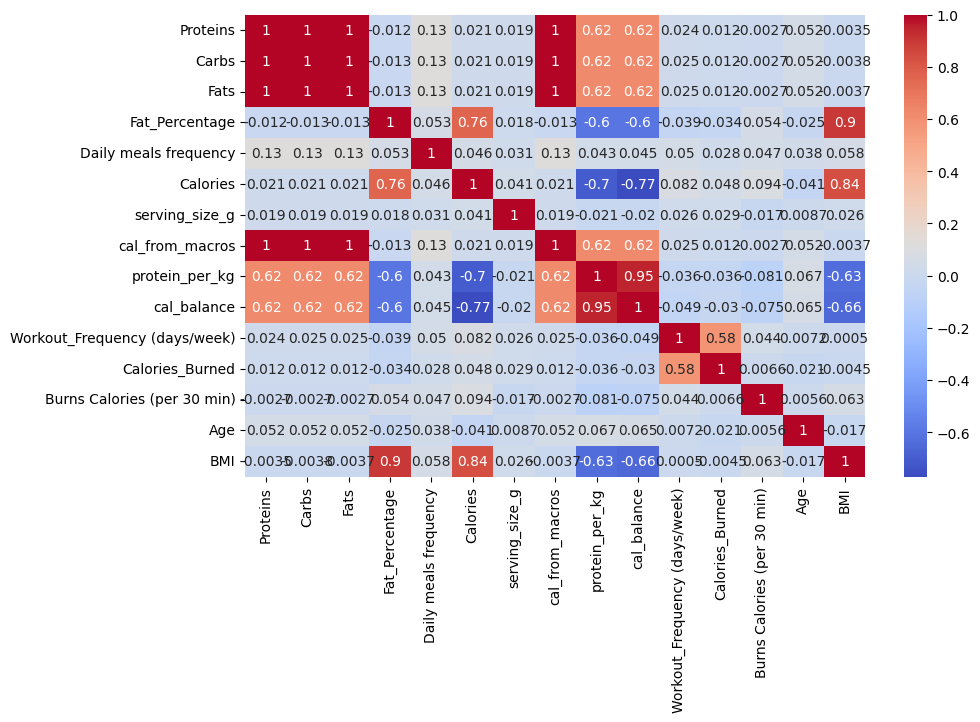

In [ ]:
cor_matrix = copydf.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(cor_matrix,annot=True,cmap='coolwarm')
plt.show()

The features I planned to use are protein,fats, carbs and fat % for model, it seems that they are higly related to each other. SO, therefore i plan to use features:
*   Protein
*   Carbs
*   Fat_Percentage
*   Calories
*   cal_from_maccros
*   protein_per_kg
*   cal_balnce
Other feauture i will be using:
*   Age
*   BMI
*   etc
to see  people with different levels of health in nutrition in each meal

##Exploring Calories and Macros
Here exploring how a person’s calories and macronutrients (proteins, carbs, fats) relate to their health. I created a few new features that help me better understand the data and prepare it for later machine learning models.

cal_from_macros: calculates how many calories come from proteins, carbs, and fats using standard nutrition rules (4 calories per gram of protein and carbs, 9 per gram of fat).

protein_per_kg: shows how much protein a person eats per kilogram of body weight, which is important for understanding nutrition quality.

cal_balance: compares the calories from macros with the total calories. This helps show whether the reported calories match the macro intake or if there are inconsistencies.

These new features help me explore patterns in the data and understand how nutrition might relate to a person’s health. This prepares the dataset for the machine learning models I will build later.

In [ ]:
# Calories from macros
df['cal_from_macros'] = (
    df['Proteins'] * 4 +
    df['Carbs'] * 4 +
    df['Fats'] * 9
)

# Protein per kg of body weight
df['protein_per_kg'] = df['Proteins'] / df['Weight (kg)']

# Calorie balance: how far macros are from total calories
df['cal_balance'] = df['cal_from_macros'] - df['Calories']

df[['Calories', 'Proteins', 'Carbs', 'Fats',
    'cal_from_macros', 'protein_per_kg', 'cal_balance']].head()


,Calories,Proteins,Carbs,Fats,cal_from_macros,protein_per_kg,cal_balance
0,1806.0,106.05,267.68,71.63,2139.59,1.624789,333.59
1,1577.0,85.41,214.32,56.97,1711.65,1.514093,134.65
2,1608.0,98.11,246.04,65.48,1965.92,1.663445,357.92
3,2657.0,80.84,203.22,54.56,1627.28,0.862017,-1029.72
4,1470.0,133.05,332.79,88.43,2659.23,2.538153,1189.23


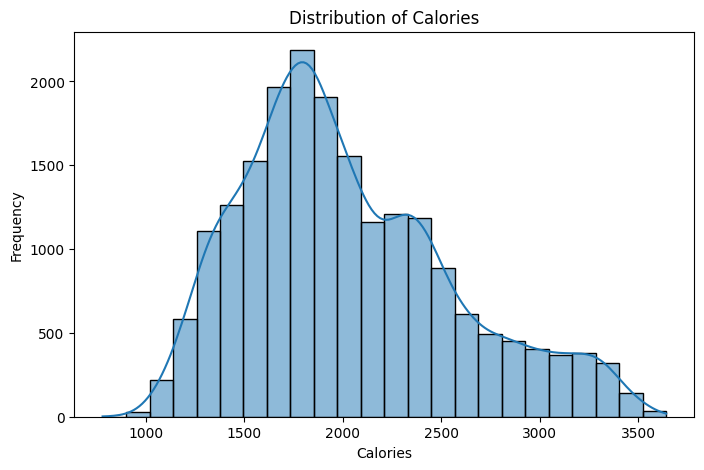

,Calories
count,20000.000000
mean,2024.418300
std,541.891521
min,781.000000
25%,1634.000000
50%,1919.000000
75%,2360.000000
max,3641.000000


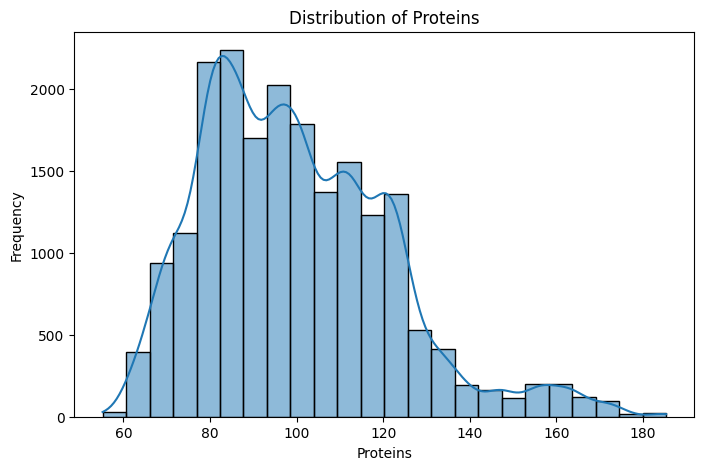

,Proteins
count,20000.00000
mean,99.91829
std,22.04367
min,55.17000
25%,83.04000
50%,97.14500
75%,113.64000
max,185.34000


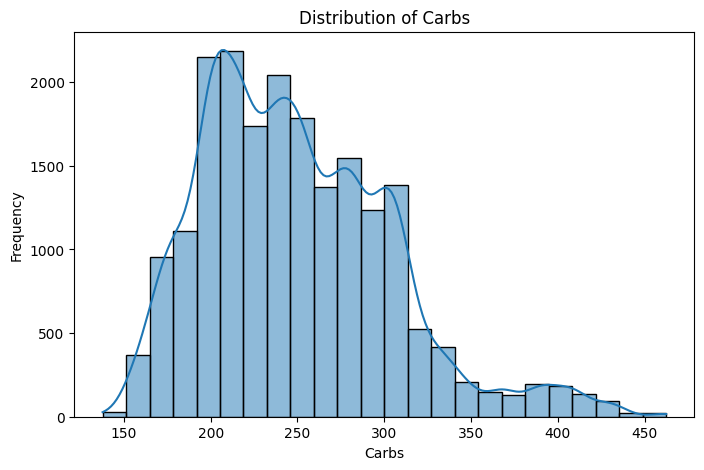

,Carbs
count,20000.000000
mean,249.778592
std,55.108623
min,137.720000
25%,207.547500
50%,242.900000
75%,283.975000
max,462.490000


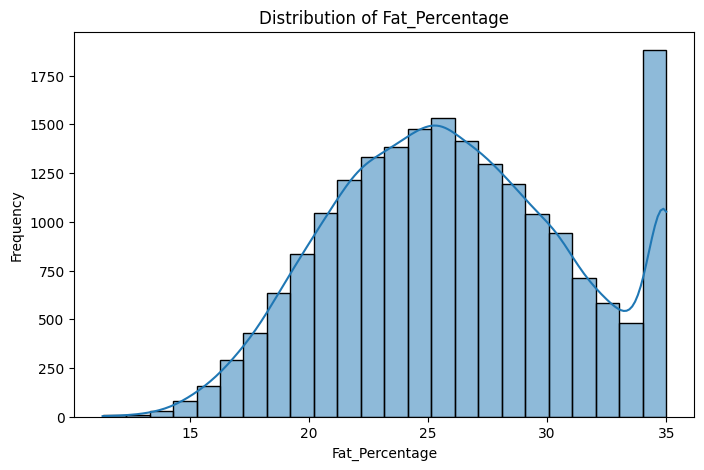

,Fat_Percentage
count,20000.000000
mean,26.101313
std,4.996160
min,11.333134
25%,22.387807
50%,25.822504
75%,29.676026
max,35.000000


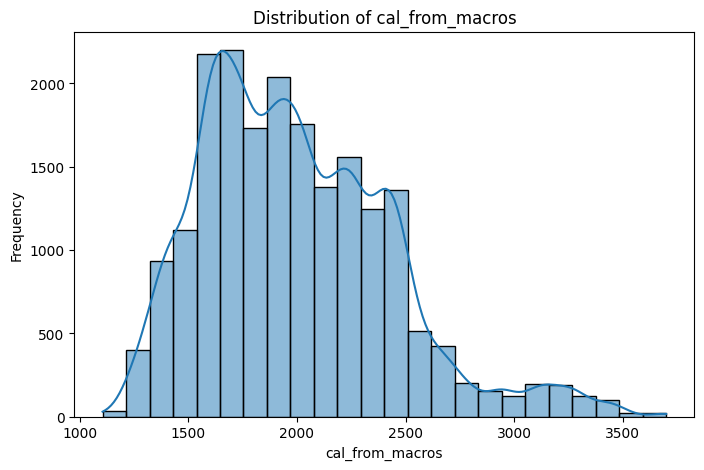

,cal_from_macros
count,20000.000000
mean,1998.297076
std,440.848408
min,1105.570000
25%,1661.022500
50%,1943.130000
75%,2271.950000
max,3699.540000


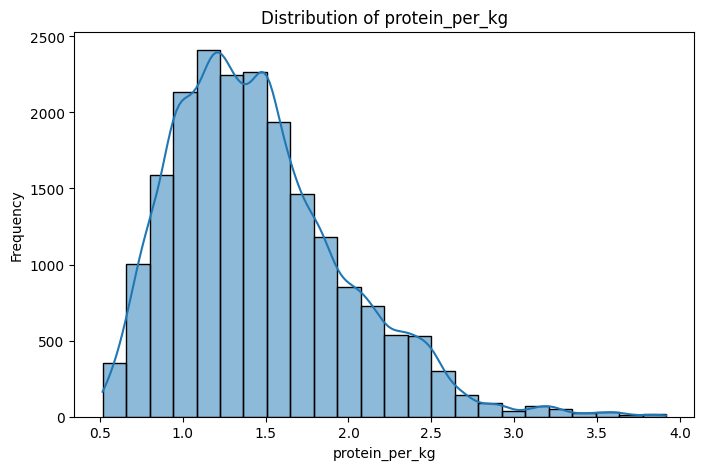

,protein_per_kg
count,20000.000000
mean,1.460142
std,0.518946
min,0.516706
25%,1.076294
50%,1.382260
75%,1.750495
max,3.916881


In [ ]:
features = ['Calories','Proteins','Carbs','Fat_Percentage','cal_from_macros','protein_per_kg']

for col in features:
    plt.figure(figsize=(8, 5))

    sns.histplot(df[col], bins=24, kde=True)

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    plt.show()

    display(df[col].describe())


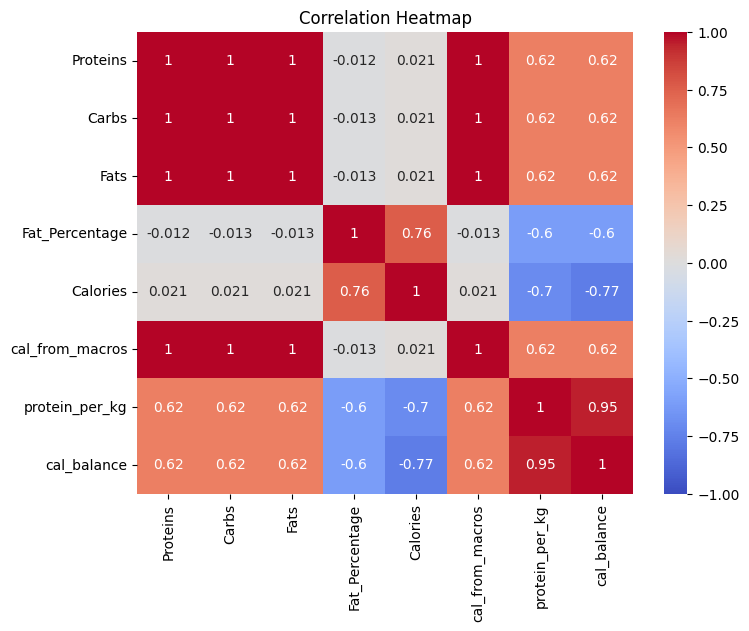

In [ ]:
corr_features = ['Proteins', 'Carbs', 'Fats', 'Fat_Percentage','Calories', 'cal_from_macros', 'protein_per_kg', 'cal_balance']

plt.figure(figsize=(8, 6))
corr_matrix = df[corr_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


Creating BMI categories:
*   Underweight
*   Normal
*   Overweight
*   Obese

These groups let me compare nutrition features (calories, protein-per-kg, fat percentage, etc.) across health levels.
This helps me understand how nutrition patterns change for people with different health statuses and helps choose features for my ML model later.

In [ ]:
bmi_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

df['BMI_group'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)

df['BMI_group'].value_counts()

,count
BMI_group,
Normal,7713
Overweight,4953
Obese,3937
Underweight,3397


In [ ]:
bmi_nutrition = df.groupby('BMI_group')[['Calories', 'protein_per_kg', 'Fat_Percentage']].mean()
bmi_nutrition

/tmp/ipython-input-2793204307.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_nutrition = df.groupby('BMI_group')[['Calories', 'protein_per_kg', 'Fat_Percentage']].mean()


,Calories,protein_per_kg,Fat_Percentage
BMI_group,,,
Underweight,1427.908154,2.044692,19.576152
Normal,1835.839492,1.543904,24.053043
Overweight,2143.419342,1.301554,28.256137
Obese,2758.845822,0.991181,33.033354


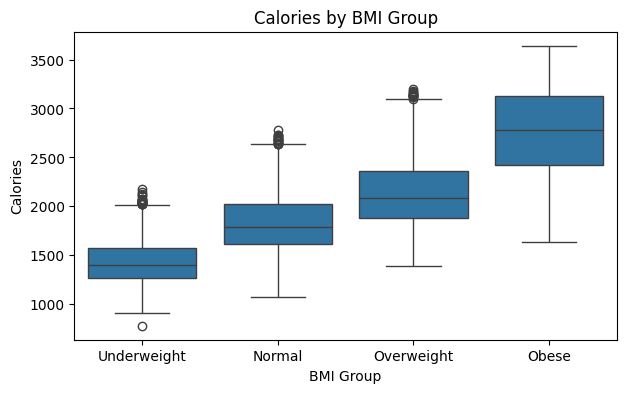

In [ ]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='BMI_group', y='Calories')
plt.title("Calories by BMI Group")
plt.xlabel("BMI Group")
plt.ylabel("Calories")
plt.show()

In [ ]:
diet_stats = df.groupby('diet_type')[['Calories', 'protein_per_kg']].mean()
diet_stats

,Calories,protein_per_kg
diet_type,,
Balanced,2017.641929,1.464302
Keto,2026.985860,1.449691
Low-Carb,2044.661734,1.455034
Paleo,2010.644138,1.473228
Vegan,2039.144749,1.442708
Vegetarian,2007.311657,1.475707


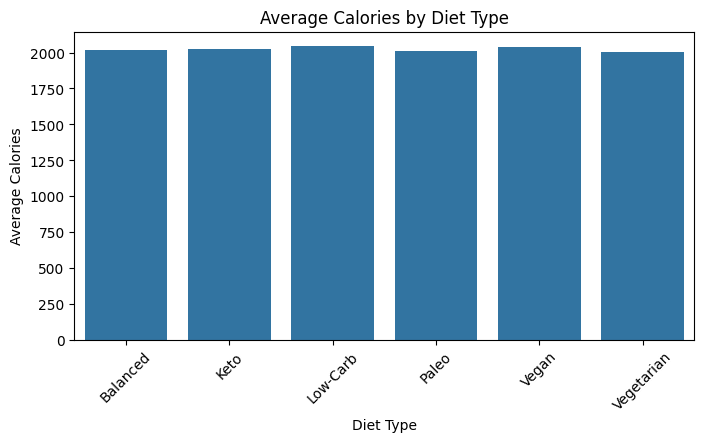

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(data=diet_stats.reset_index(), x='diet_type', y='Calories')
plt.title("Average Calories by Diet Type")
plt.xlabel("Diet Type")
plt.ylabel("Average Calories")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Healthy if calorie balance is >= 0
df['is_healthy'] = (df['cal_balance'] >= 0).astype(int)

df[['cal_balance', 'is_healthy']].head()

,cal_balance,is_healthy
0,333.59,1
1,134.65,1
2,357.92,1
3,-1029.72,0
4,1189.23,1


In [ ]:
health_stats = df.groupby('is_healthy')[['Calories', 'protein_per_kg','Fat_Percentage', 'cal_from_macros']].mean()
health_stats

,Calories,protein_per_kg,Fat_Percentage,cal_from_macros
is_healthy,,,,
0,2365.219696,1.060730,28.527528,1785.918812
1,1687.614773,1.854868,23.703560,2208.183976


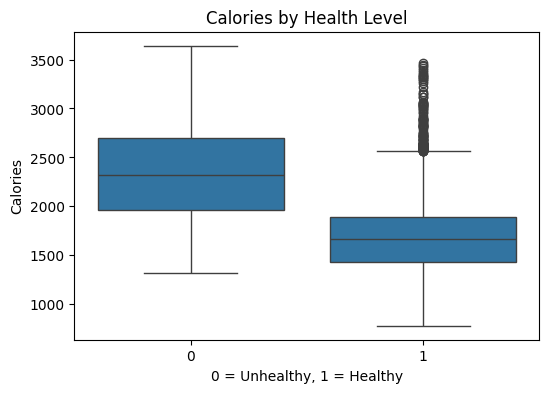

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='is_healthy', y='Calories')
plt.title("Calories by Health Level")
plt.xlabel("0 = Unhealthy, 1 = Healthy")
plt.ylabel("Calories")
plt.show()


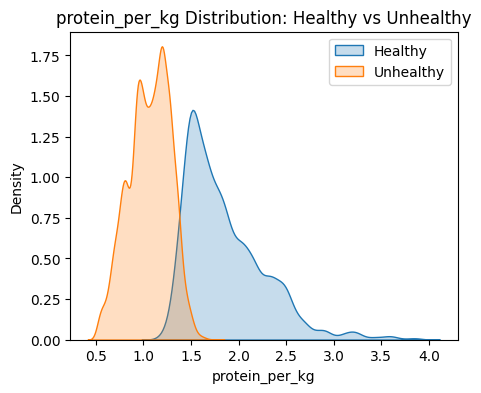

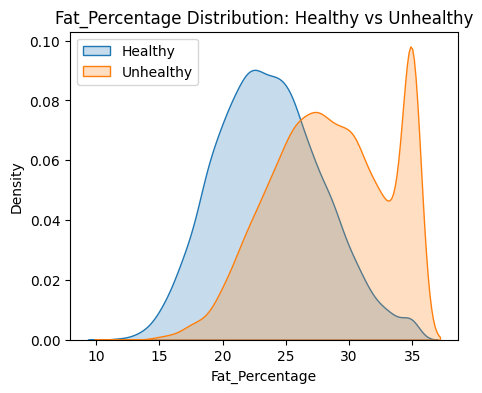

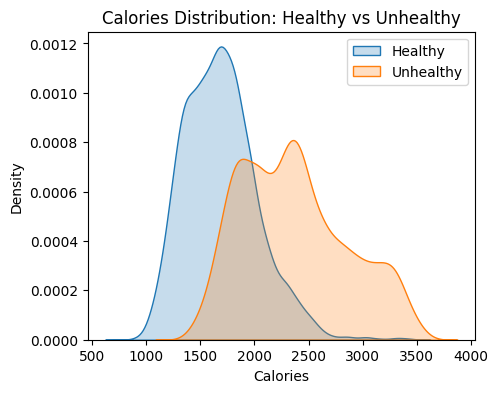

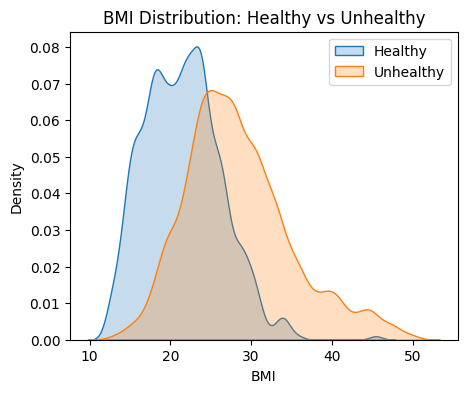

In [ ]:
healthy = df[df['is_healthy'] == 1]
unhealthy = df[df['is_healthy'] == 0]

features_kde = ['protein_per_kg', 'Fat_Percentage', 'Calories', 'BMI']

for f in features_kde:
    plt.figure(figsize=(5, 4))
    sns.kdeplot(healthy[f], label="Healthy", fill=True)
    sns.kdeplot(unhealthy[f], label="Unhealthy", fill=True)
    plt.title(f"{f} Distribution: Healthy vs Unhealthy")
    plt.legend()
    plt.show()

## Key Findings from EDA:
- Protein, carbs, and fats strongly influence cal_from_macros.
- cal_balance varies greatly, suggesting inconsistencies in user-reported data.
- Fat percentage shows moderate correlation with calorie intake.
- protein_per_kg varies widely, indicating differences in diet quality per body weight.

## What I Learned from My EDA (Patterns in My Features)

From my exploratory data analysis, I observed several important patterns in the dataset:

1. **Calories, carbs, and fats are right-skewed.**  
   Most individuals fall in a moderate range, but a smaller group consumes very high calories and high amounts of carbs and fats.

2. **Protein per kg mostly stays between 1.2–1.5 g/kg.**  
   This is typical for healthy or active individuals. People with higher BMI tend to have lower protein per kg.

3. **Calories from macros are strongly correlated with total calories.**  
   This makes sense because total calorie intake comes directly from protein, carbohydrates, and fats.

4. **BMI groups show clear nutritional differences:**
   - Underweight and Normal BMI groups generally consume fewer calories.
   - Overweight and Obese groups consume higher calories.
   - Obese individuals tend to have higher fat percentage but lower protein per kg.

5. **Balanced macro intake is linked to healthier BMI.**  
   People with Normal BMI tend to have more balanced calorie intake and higher protein per kg.

### Overall Pattern

Healthier individuals usually have:
- Moderate calorie intake  
- Higher protein per kg  
- Balanced macro ratios  

Less healthy individuals often show:
- Higher calorie intake  
- Higher fat percentage  
- Lower protein per kg relative to body weight  

### EDA Summary

- The dataset has 20,000 rows and 54 columns, with no missing values in the main features I used.
- Calories, carbs, and fats are right-skewed: most people eat in a moderate range, with some higher-calorie outliers.
- Protein per kg peaks around 1.2–1.5 g/kg, which is a typical target for active people.
- `cal_from_macros` is strongly positively correlated with total calories, as expected.
- `protein_per_kg` is moderately correlated with calories and `cal_balance`.
- BMI groups show a clear pattern:
  - Underweight and Normal groups have lower average calories.
  - Overweight and Obese groups have higher average calories and slightly lower protein per kg.
- Overall, healthier patterns seem to be: moderate calories, higher protein per kg, and more balanced macro intake.